In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Doldurulmuş dosyamızla çalışmak için abd_egitim_sistemi  ne atamamızı yapalım...

In [4]:
abd_egitim_sistemi = pd.read_csv("abd_egitim_sistemi_temiz.csv")

### Tukey'in metoduyla "TOTAL_REVENUE " değişkeni için aykırı değer sayısını bulalım

In [5]:
q75, q25 = np.percentile(abd_egitim_sistemi["TOTAL_REVENUE"], [75 ,25])
caa = q75 - q25

In [6]:
esik_degerleri=pd.DataFrame(columns=['esik_degeri','aykiri_deger_sayısı'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((abd_egitim_sistemi["TOTAL_REVENUE"] > maks_deger)| 
                                       (abd_egitim_sistemi["TOTAL_REVENUE"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayısı
0,1.0,194.0
1,1.5,150.0
2,2.0,121.0
3,2.5,93.0
4,3.0,66.0
5,3.5,51.0
6,4.0,45.0
7,4.5,42.0


### Tukey'in metoduyla "TOTAL_EXPENDITURE" değişkeni için aykırı değer sayısını bulalım

In [7]:
q75, q25 = np.percentile(abd_egitim_sistemi["TOTAL_EXPENDITURE"], [75 ,25])
caa = q75 - q25

In [8]:
esik_degerleri=pd.DataFrame(columns=['esik_degeri','aykiri_deger_sayısı'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((abd_egitim_sistemi["TOTAL_EXPENDITURE"] > maks_deger)| 
                                       (abd_egitim_sistemi["TOTAL_EXPENDITURE"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayısı
0,1.0,190.0
1,1.5,148.0
2,2.0,113.0
3,2.5,91.0
4,3.0,61.0
5,3.5,52.0
6,4.0,49.0
7,4.5,43.0


### Toplam Geliri winsorize edelim

In [9]:
from scipy.stats.mstats import winsorize

winsorize_toplam_gelir = winsorize(abd_egitim_sistemi["TOTAL_REVENUE"], (0, 0.10))

winsorize_toplam_gelir

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

### Toplam Gelirin winsorize edilmiş halinin kutu grafiğini çizdirelim

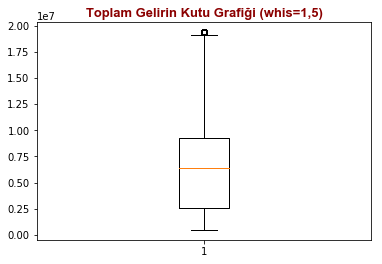

In [10]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(winsorize_toplam_gelir)
plt.title("Toplam Gelirin Kutu Grafiği (whis=1,5)", fontdict=baslik_font)
plt.show()

### Toplam Harcamayı winsorize edelim

In [11]:
from scipy.stats.mstats import winsorize

winsorize_toplam_harcama = winsorize(abd_egitim_sistemi["TOTAL_EXPENDITURE"], (0, 0.10))

winsorize_toplam_harcama

masked_array(data=[2653798.     ,  972488.     , 3401580.     , ...,
                   9196680.86875, 9196680.86875, 9196680.86875],
             mask=False,
       fill_value=1e+20)

### Toplam Harcamanın winsorize edilmiş halinin kutu grafiğini çizdirelim

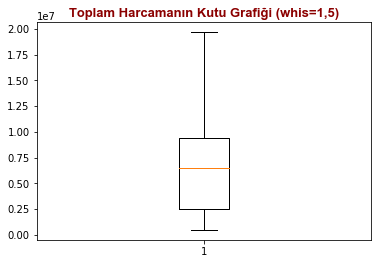

In [12]:
plt.boxplot(winsorize_toplam_harcama)
plt.title("Toplam Harcamanın Kutu Grafiği (whis=1,5)", fontdict=baslik_font)
plt.show()

### Toplam Geliri ve Log dönüşümlü halinin kutu grafiklerini yanyana çizdirelim

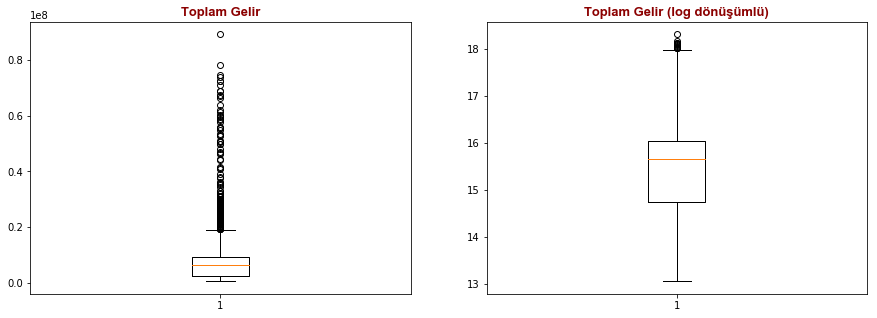

In [13]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(abd_egitim_sistemi["TOTAL_REVENUE"])
plt.title("Toplam Gelir", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(abd_egitim_sistemi["TOTAL_REVENUE"]))
plt.title("Toplam Gelir (log dönüşümlü)", fontdict=baslik_font)
plt.show()

### Toplam Harcamanın ve Log dönüşümlü halinin kutu grafiklerini yanyana çizdirelim

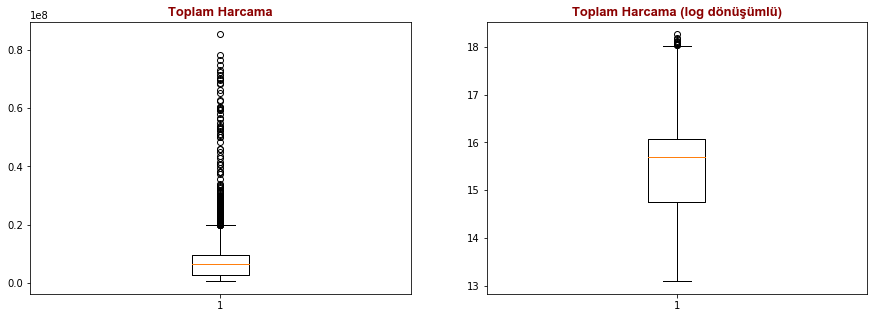

In [14]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(abd_egitim_sistemi["TOTAL_EXPENDITURE"])
plt.title("Toplam Harcama", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]))
plt.title("Toplam Harcama (log dönüşümlü)", fontdict=baslik_font)
plt.show()

### Aykırı değerlerin azalıp azalmadığını görmek için "TOTAL_REVENUE " değişkeninin sade halinin ve log alınmış halinin Tukey'in metoduyla aykırı değerlerini kıyaslayalım

In [15]:
q75_log, q25_log = np.percentile(np.log(abd_egitim_sistemi["TOTAL_REVENUE"]), [75 ,25])
caa_log = q75_log - q25_log


In [16]:
log_esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi', 'aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log = q25_log - (caa_log*esik_degeri) 
    maks_deger_log = q75_log + (caa_log*esik_degeri)
    min_deger = q25 - (caa*esik_degeri) #log dönüşümü olmadan
    maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
    
    aykiri_deger_sayisi_log = len((np.where((np.log(abd_egitim_sistemi["TOTAL_REVENUE"]) > maks_deger_log)| 
                                       (np.log(abd_egitim_sistemi["TOTAL_REVENUE"]) < min_deger_log))[0]))
    aykiri_deger_sayisi = len((np.where((abd_egitim_sistemi["TOTAL_REVENUE"] > maks_deger)| 
                                       (abd_egitim_sistemi["TOTAL_REVENUE"]< min_deger))[0]))
    log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                    'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                    'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                    }, ignore_index=True)
log_esik_degerleri

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.0,189.0,69.0
1,1.5,139.0,12.0
2,2.0,114.0,0.0
3,2.5,85.0,0.0
4,3.0,59.0,0.0
5,3.5,50.0,0.0
6,4.0,45.0,0.0
7,4.5,42.0,0.0


### Aynı işlemi "TOTAL_EXPENDITURE" değişkeni için de gerçekleyelim

In [17]:
q75_log, q25_log = np.percentile(np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]), [75 ,25])
caa_log = q75_log - q25_log

In [18]:
log_esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi', 'aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log = q25_log - (caa_log*esik_degeri) 
    maks_deger_log = q75_log + (caa_log*esik_degeri)
    min_deger = q25 - (caa*esik_degeri) #log dönüşümü olmadan
    maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
    
    aykiri_deger_sayisi_log = len((np.where((np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]) > maks_deger_log)| 
                                       (np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]) < min_deger_log))[0]))
    aykiri_deger_sayisi = len((np.where((abd_egitim_sistemi["TOTAL_EXPENDITURE"] > maks_deger)| 
                                       (abd_egitim_sistemi["TOTAL_EXPENDITURE"]< min_deger))[0]))
    log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                    'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                    'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                    }, ignore_index=True)
log_esik_degerleri

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.0,190.0,63.0
1,1.5,148.0,12.0
2,2.0,113.0,0.0
3,2.5,91.0,0.0
4,3.0,61.0,0.0
5,3.5,52.0,0.0
6,4.0,49.0,0.0
7,4.5,43.0,0.0


### Aykırı değerleri temizlemeden " Bütçe Açığı " değişkenini oluşturalım

In [19]:
abd_egitim_sistemi["Bütçe Açığı"]=abd_egitim_sistemi["TOTAL_REVENUE"]-abd_egitim_sistemi["TOTAL_EXPENDITURE"] 
butce_acıgı_tablosu=pd.DataFrame({'Toplam Gelir':abd_egitim_sistemi["TOTAL_REVENUE"],
                          'Toplam Harcama':abd_egitim_sistemi["TOTAL_EXPENDITURE"],
                          'Bütçe Açığı':abd_egitim_sistemi["Bütçe Açığı"]
                          })
butce_acıgı_tablosu

,Toplam Gelir,Toplam Harcama,Bütçe Açığı
0,2.678885e+06,2.653798e+06,25087.000000
1,1.049591e+06,9.724880e+05,77103.000000
2,3.258079e+06,3.401580e+06,-143501.000000
3,1.711959e+06,1.743022e+06,-31063.000000
4,2.626002e+07,2.713883e+07,-878807.000000
5,3.185173e+06,3.264826e+06,-79653.000000
6,3.834302e+06,3.721338e+06,112964.000000
7,6.452330e+05,6.387840e+05,6449.000000
8,7.094800e+05,7.428930e+05,-33413.000000
9,1.150630e+07,1.130564e+07,200657.000000


### Aykırı değerleri temizlenmeden oluşturulan" Bütçe Açığı " değişkeni için Tukey'in metoduyla aykırı değer sayısını bulalım

In [20]:
q75, q25 = np.percentile(abd_egitim_sistemi["Bütçe Açığı"], [75 ,25])
caa = q75 - q25

In [21]:
esik_degerleri=pd.DataFrame(columns=['esik_degeri','aykiri_deger_sayısı'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where(( abd_egitim_sistemi["Bütçe Açığı"]> maks_deger)| 
                                       (abd_egitim_sistemi["Bütçe Açığı"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayısı
0,1.0,358.0
1,1.5,275.0
2,2.0,231.0
3,2.5,182.0
4,3.0,147.0
5,3.5,124.0
6,4.0,111.0
7,4.5,97.0


### Aykırı değerleri temizlenmeden oluşturulan" Bütçe Açığı " değişkenini winsorize edelim

In [22]:
from scipy.stats.mstats import winsorize

winsorize_butce_acıgı =(abd_egitim_sistemi["Bütçe Açığı"], (0, 0.10))

winsorize_butce_acıgı

(0        25087.000000
 1        77103.000000
 2      -143501.000000
 3       -31063.000000
 4      -878807.000000
 5       -79653.000000
 6       112964.000000
 7         6449.000000
 8       -33413.000000
 9       200657.000000
 10         959.000000
 11      -43312.000000
 12      -26832.000000
 13     -101910.000000
 14     -122480.000000
 15     -131840.000000
 16       10433.000000
 17      124820.000000
 18      -21600.000000
 19      -22050.000000
 20      -39876.000000
 21      272099.000000
 22     -207551.000000
 23     -296441.000000
 24       -7284.000000
 25     -153918.000000
 26       47974.000000
 27        8367.000000
 28     -154575.000000
 29       -3256.000000
             ...      
 1462   -104599.010156
 1463   -104599.010156
 1464   -104599.010156
 1465   -104599.010156
 1466   -104599.010156
 1467   -104599.010156
 1468   -104599.010156
 1469   -104599.010156
 1470   -104599.010156
 1471   -104599.010156
 1472   -104599.010156
 1473   -104599.010156
 1474   -10

### Aykırı değerleri temizlenmeden oluşturulan" Bütçe Açığı " değişkeninin winsorize edilmiş halinin kutu grafiğini çizdirelim

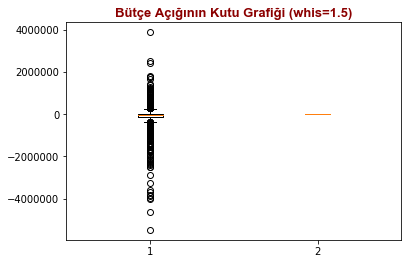

In [23]:
plt.boxplot(winsorize_butce_acıgı)
plt.title("Bütçe Açığının Kutu Grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

### Aykırı değerleri temizlenmiş " Bütçe Açığı " değişkenini oluşturalım

In [67]:
abd_egitim_sistemi["Bütçe Açığı Temiz"]=np.log(abd_egitim_sistemi["TOTAL_REVENUE"])-np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]) 
butce_acıgı_tablosu2=pd.DataFrame({'Toplam Gelir':np.log(abd_egitim_sistemi["TOTAL_REVENUE"]),
                          'Toplam Harcama':np.log(abd_egitim_sistemi["TOTAL_EXPENDITURE"]),
                          'Bütçe Açığı':abd_egitim_sistemi["Bütçe Açığı Temiz"]
                          })
butce_acıgı_tablosu2

,Toplam Gelir,Toplam Harcama,Bütçe Açığı
0,14.800911,14.791502,0.009409
1,13.863911,13.787613,0.076298
2,14.996648,15.039751,-0.043102
3,14.353149,14.371131,-0.017982
4,17.083558,17.116476,-0.032918
5,14.974017,14.998717,-0.024700
6,15.159498,15.129594,0.029904
7,13.377367,13.367322,0.010045
8,13.472288,13.518307,-0.046020
9,16.258405,16.240812,0.017593


### Aykırı değerleri temizlenerek oluşturulan" Bütçe Açığı " değişkeni için Tukey'in metoduyla aykırı değer sayısını bulalım

In [68]:
q75, q25 = np.percentile(abd_egitim_sistemi["Bütçe Açığı Temiz"], [75 ,25])
caa = q75 - q25

In [70]:
esik_degerleri=pd.DataFrame(columns=['esik_degeri','aykiri_deger_sayısı'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where(( abd_egitim_sistemi["Bütçe Açığı Temiz"]> maks_deger)| 
                                       (abd_egitim_sistemi["Bütçe Açığı Temiz"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayısı
0,1.0,209.0
1,1.5,107.0
2,2.0,51.0
3,2.5,26.0
4,3.0,16.0
5,3.5,13.0
6,4.0,10.0
7,4.5,8.0
